In [24]:
from astropy.coordinates import EarthLocation
from astropy.utils import iers
from astropy.coordinates import get_body_barycentric,get_body_barycentric_posvel, get_body, get_moon
from astropy.utils import iers
from astropy.coordinates import get_body_barycentric,get_body_barycentric_posvel, get_body, get_moon
from astropy.coordinates import solar_system_ephemeris
from astropy.coordinates import EarthLocation
from astropy import units
from astropy.coordinates import CartesianRepresentation, CartesianDifferential, SkyCoord, GCRS
from math import acos, cos
from astropy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np

import astropy
import astropy.coordinates
from astropy.time import Time
from importlib import reload  
from math import ceil
import doppler
import util
import os

In [73]:
#Setup Environment
from importlib import reload  
reload(doppler)
reload(util)
from doppler import DopplerSystemEME, save, load
from util import get_earth_grid, Grid, nearest

iers.conf.iers_auto_url = 'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
solar_system_ephemeris.set('jpl') 


<ScienceState solar_system_ephemeris: 'jpl'>

In [26]:
#Setup Doppler Instance
start_string = '2020-01-01T00:00:00.00Z'
timestep = units.Quantity('15 min')
timespan = units.Quantity('24 hour')
emitters = [EarthLocation.from_geodetic(lat = "38°25'53.6", lon = "-79.839896°", height=0), 
           EarthLocation.from_geodetic(lat = "58°25'53.6", lon = "-50.839896°", height=0)]

reciever = EarthLocation.from_geodetic(lat = "38°25'53.6", lon ="-79°49'08.9", height=0)

start_time = Time(start_string, format='isot', scale='utc')
doppler_system = DopplerSystemEME(emitters, reciever, start_time, timestep, timespan, only_visible = False, signal=10e6)

In [27]:
#Calculate and save
doppler_system.update()
doppler_system.save_plots('demo2/')
#doppler_system.save('demo2/state.json')

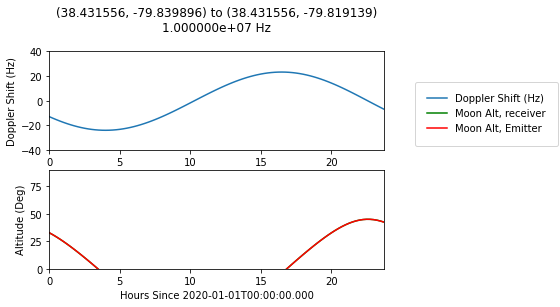

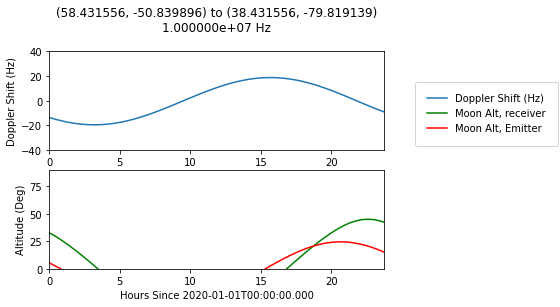

In [28]:
doppler_system.get_plot(0)
doppler_system.get_plot(1)

In [29]:
#Same, but with many emitters around Earth
emitters = get_earth_grid(20).lst
reciever = EarthLocation.from_geodetic(lat = "38°25'53.6", lon ="-79°49'08.9", height=0) #GBT
start_string = '2020-01-01T00:00:00.00Z'
timestep = units.Quantity('15 min')
timespan = units.Quantity('4 hour')
start_time = Time(start_string, format='isot', scale='utc')
doppler_system2 = DopplerSystemEME(emitters, reciever, start_time, timestep, timespan, only_visible = True)

In [30]:
doppler_system2.update()
doppler_system2.save_plots('demo3/')

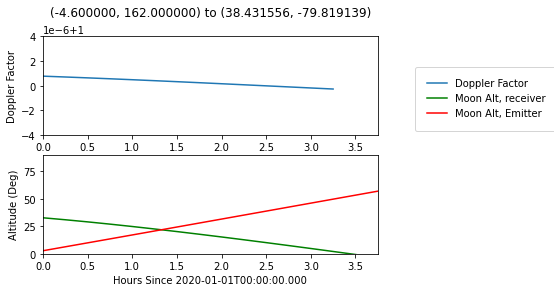

In [75]:
doppler_system3 = DopplerSystemEME([EarthLocation.from_geodetic(lat='-4.600000', lon= '162.000000')], reciever, start_time, timestep, timespan)
doppler_system3.update()
observation = doppler_system3.get_dopplers()[0]
doppler_system3.get_plot(0)

[199 219 179 159 300]


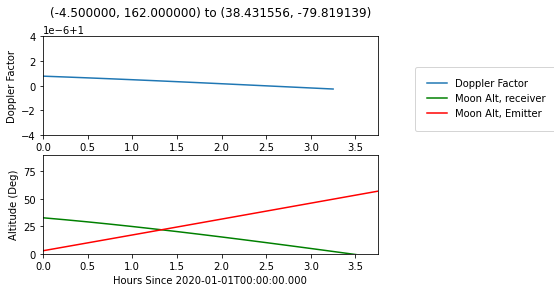

In [76]:
def center(array):
    average = np.nansum(array)/sum(~np.isnan(array))
    return array-average

min_sort = nearest(doppler_system2.get_dopplers(), observation)
print(min_sort[0:5])
    
doppler_system2.get_plot(199)
    

def is_local_min(signal, dopplers, idx, n):
    pass
    

def get_closest(a, b):
    m = 99999999
    ind = -1
    c = b-a 
    for i in range(0, len(emitters)):
        count = np.count_nonzero(~np.isnan(c))
        if count >2:
            err  = np.nansum(np.abs(c[i]))/count
            if err < m:
                ind = i
                m = err
    return ind

In [23]:
grid = get_earth_grid(20)
for i in range(0, 20):
    for j in range(0,20):
        g = grid.get(i,j)
        print(g.lat, g.lon)

-85d30m00s 162d00m00s
-76d30m00s 162d00m00s
-67d30m00s 162d00m00s
-58d30m00s 162d00m00s
-49d30m00s 162d00m00s
-40d30m00s 162d00m00s
-31d30m00s 162d00m00s
-22d30m00s 162d00m00s
-13d30m00s 162d00m00s
-4d30m00s 162d00m00s
4d30m00s 162d00m00s
13d30m00s 162d00m00s
22d30m00s 162d00m00s
31d30m00s 162d00m00s
40d30m00s 162d00m00s
49d30m00s 162d00m00s
58d30m00s 162d00m00s
67d30m00s 162d00m00s
76d30m00s 162d00m00s
85d30m00s 162d00m00s
-76d30m00s -180d00m00s
-76d30m00s -162d00m00s
-76d30m00s -144d00m00s
-76d30m00s -126d00m00s
-76d30m00s -108d00m00s
-76d30m00s -90d00m00s
-76d30m00s -72d00m00s
-76d30m00s -54d00m00s
-76d30m00s -36d00m00s
-76d30m00s -18d00m00s
-76d30m00s 0d00m00s
-76d30m00s 18d00m00s
-76d30m00s 36d00m00s
-76d30m00s 54d00m00s
-76d30m00s 72d00m00s
-76d30m00s 90d00m00s
-76d30m00s 108d00m00s
-76d30m00s 126d00m00s
-76d30m00s 144d00m00s
-76d30m00s 162d00m00s
-67d30m00s -180d00m00s
-67d30m00s -162d00m00s
-67d30m00s -144d00m00s
-67d30m00s -126d00m00s
-67d30m00s -108d00m00s
-67d30m00s -90d00m0